In [6]:
import pandas as pd
import os

# Viz libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import folium
from folium.plugins import HeatMap, FastMarkerCluster
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go

In [7]:
# local filename we're reading in
folder = 'Race Dashboard data'
filename = 'df_weekly_with_calcs.xlsx'

path = os.path.join(folder, filename)

In [32]:
df = pd.read_excel(path)
df['OEE %'] = df['OEE %'].mul(100)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

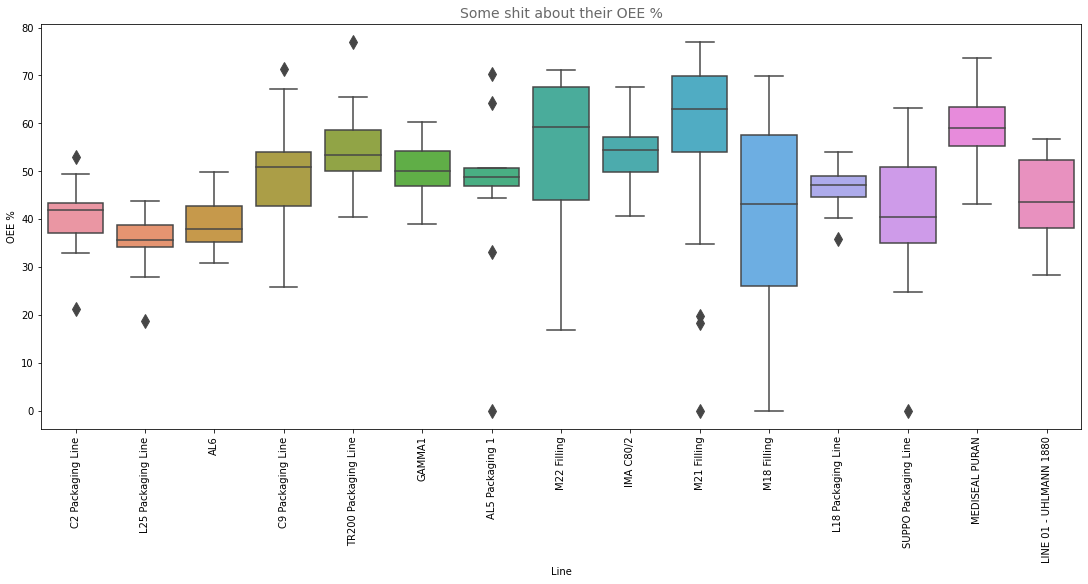

In [33]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 8))

sns.boxplot(x='Line', y='OEE %', data=df, whis=1.5, fliersize=10).set_title('Some shit about their OEE %', color='dimgrey', size=14)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

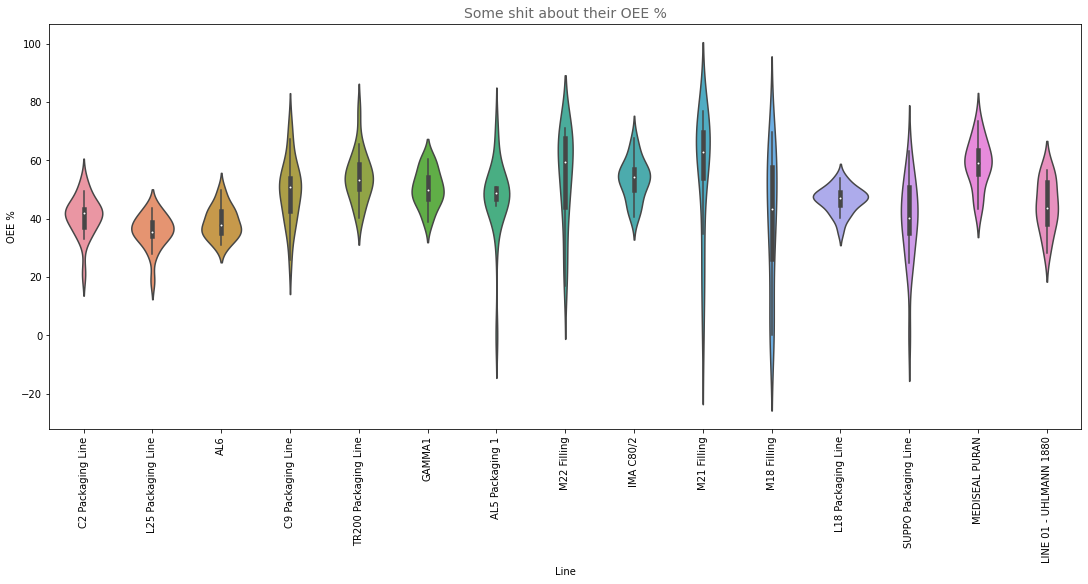

In [39]:
# ax = sns.violinplot(x="Line", y="OEE %", data=df)
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 8))

sns.violinplot(x='Line', y='OEE %', data=df, whis=1.5, fliersize=10).set_title('Some shit about their OEE %', color='dimgrey', size=14)
plt.xticks(rotation=90)

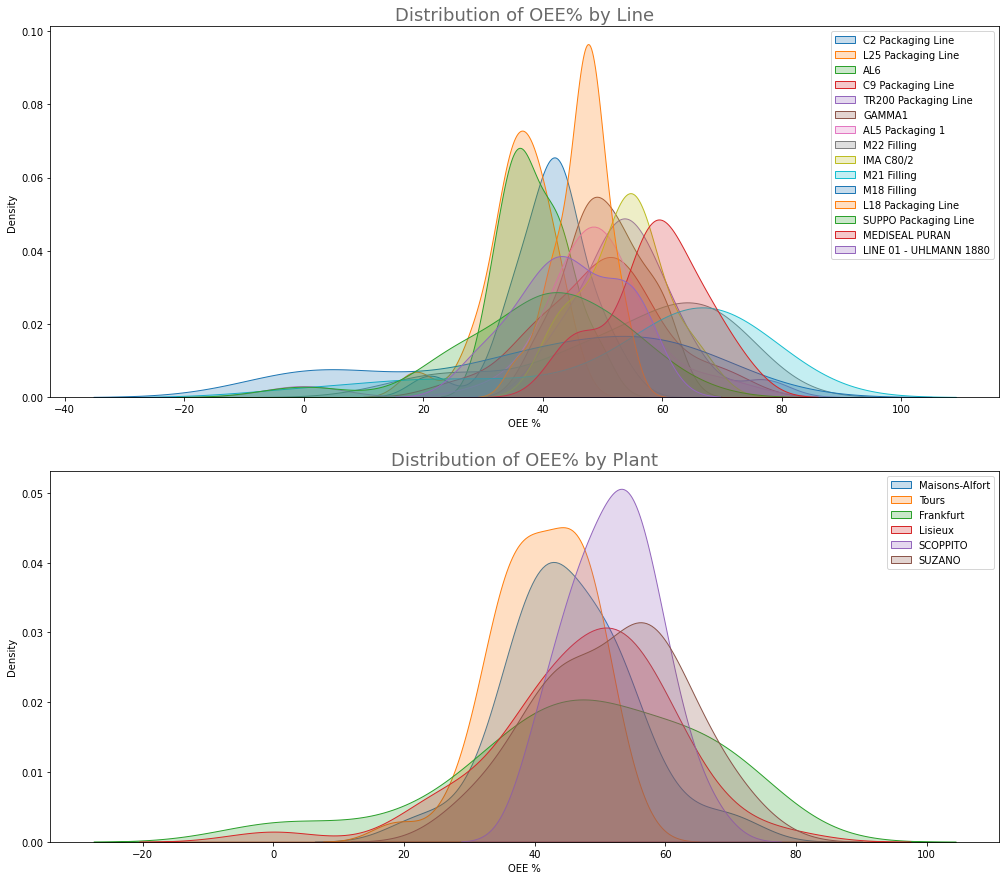

In [34]:
# colors = ['darkslateblue', 'mediumseagreen', 'gray', 'salmon', 'cornflowerblue', 'cadetblue', 'gold']

fig, axs = plt.subplots(2, 1, figsize=(17, 15))
for line in df.Line.unique():
#     idx = rest_types.index(user)
#     kde_data = day_data.loc[day_data['value'] == user]
    mask = (df['Line'] == line)
    kde_data = df['OEE %'].loc[mask]
    sns.kdeplot(data=kde_data, ax=axs[0], shade=True, label=line, bw_method=0.5)
    
for plant in df.Plant.unique():
#     idx = rest_types.index(user)
#     kde_data = day_data.loc[day_data['value'] == user]
    mask = (df['Plant'] == plant)
    kde_data = df['OEE %'].loc[mask]
    sns.kdeplot(data=kde_data, ax=axs[1], shade=True, label=plant, bw_method=0.5)
    
# Customizing charts
axs[0].set_title('Distribution of OEE% by Line', color='dimgrey', size=18)
axs[1].set_title('Distribution of OEE% by Plant', color='dimgrey', size=18)
axs[0].legend()
axs[1].legend()

In [37]:
df.groupby('Line').mean()

,Unnamed: 0,OEE %,WeekOfYear,Year,OEE Start point,OEE% Target (2022),Unplanned_tech_loss,Changeover,rolling_std,Best Solution,...,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9,sector_10,sector_11,sector_12,lap_time
Line,,,,,,,,,,,,,,,,,,,,,
AL5 Packaging 1,142.5500,47.136549,22.5,2021.0,0.479693,0.500,0.310294,0.298820,0.099928,25.00,...,0.092902,-0.2500,-0.2300,0.0000,-0.4475,-0.1975,0.0000,0.0000,-0.58125,-1.203409
AL6,142.3500,38.715556,22.5,2021.0,0.332657,0.485,0.350605,0.070317,0.046461,48.75,...,0.079405,-0.4875,-0.1400,0.0000,-0.4475,-0.1975,0.0000,0.0000,-0.58125,-1.375926
C2 Packaging Line,142.4000,40.981872,22.5,2021.0,0.399597,0.470,0.467445,0.061895,0.059141,0.00,...,0.044412,0.0000,0.0000,-0.2375,0.0000,0.0000,0.0000,-0.2575,-0.20000,-0.123369
C9 Packaging Line,140.6500,49.583031,22.5,2021.0,0.419899,0.530,0.363597,0.050502,0.081975,46.25,...,0.050577,-0.4625,-0.2200,0.0000,0.0000,-0.2400,-0.2200,-0.4225,-0.20000,-1.280890
GAMMA1,141.8000,50.455790,22.5,2021.0,0.418683,0.650,0.221476,0.258763,0.051474,87.00,...,0.220899,-0.8700,-0.1475,-0.4450,-0.1800,-0.6725,-0.1825,-0.2000,-0.32500,-2.531710
IMA C80/2,140.2000,53.470527,22.5,2021.0,0.451031,0.650,0.204715,0.174383,0.054071,68.00,...,0.166522,-0.6800,-0.3150,-0.2875,-0.1800,-0.6725,-0.1825,-0.2000,-0.32500,-2.424300
L18 Packaging Line,142.4000,46.533159,22.5,2021.0,0.377683,0.547,0.160673,0.151943,0.039129,21.75,...,0.151185,-0.2175,-0.2125,0.0000,0.0000,-0.1675,-0.2575,0.0000,0.00000,-0.506677
L25 Packaging Line,142.4500,35.790412,22.5,2021.0,0.351564,0.478,0.212803,0.282601,0.047266,0.00,...,0.249868,0.0000,-0.2125,0.0000,0.0000,-0.1675,-0.2575,0.0000,0.00000,-0.129366
LINE 01 - UHLMANN 1880,171.7500,44.628974,24.5,2021.0,0.430678,0.520,0.229205,0.086769,0.076141,0.00,...,0.063323,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.362900
